In [23]:
import pandas as pd
from pandas import *
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
import datetime as dt

import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [24]:
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [25]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [27]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [28]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [100]:
univariate_column_label=['AEDAHO_T9_V2']
univariate_data_set=test_new.iloc[2000:5000][univariate_column_label] #just for checking whether it is working or not
print(univariate_data_set.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-10 10:31:00     64.434328
2019-04-10 10:30:00     67.651555
2019-04-10 10:29:00     68.233293
2019-04-10 10:28:00     65.349113
2019-04-10 10:27:00     60.423638


In [101]:
univariate_data=univariate_data_set.loc[::-1]
print(univariate_data.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-07 09:41:00     71.135968
2019-04-07 09:42:00     70.913978
2019-04-07 09:43:00     71.027346
2019-04-07 09:44:00     71.401352
2019-04-07 09:45:00     71.615506


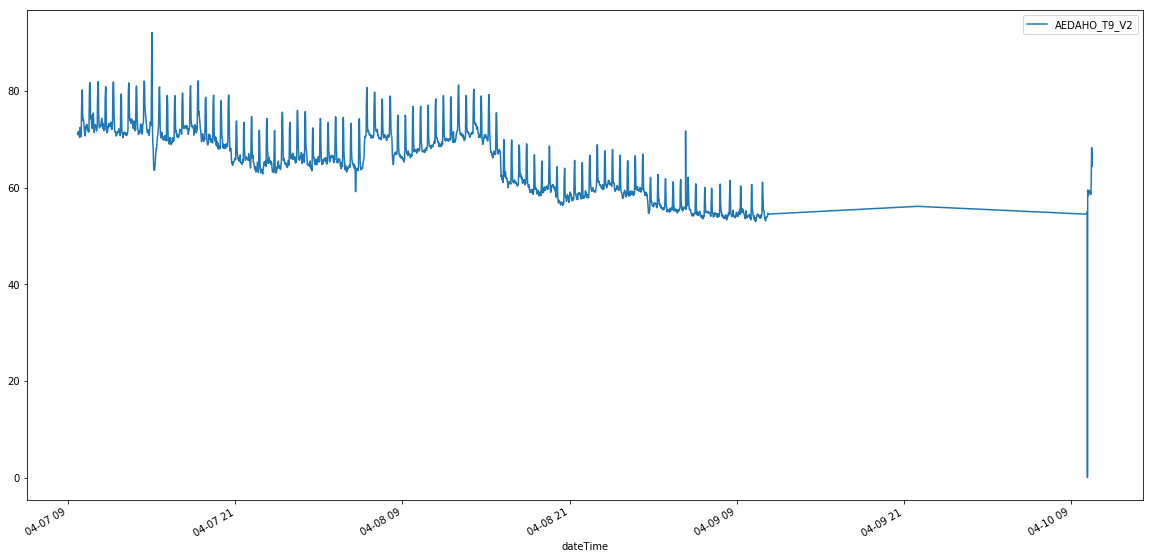

In [102]:
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [103]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
univariate_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,univariate_mean)

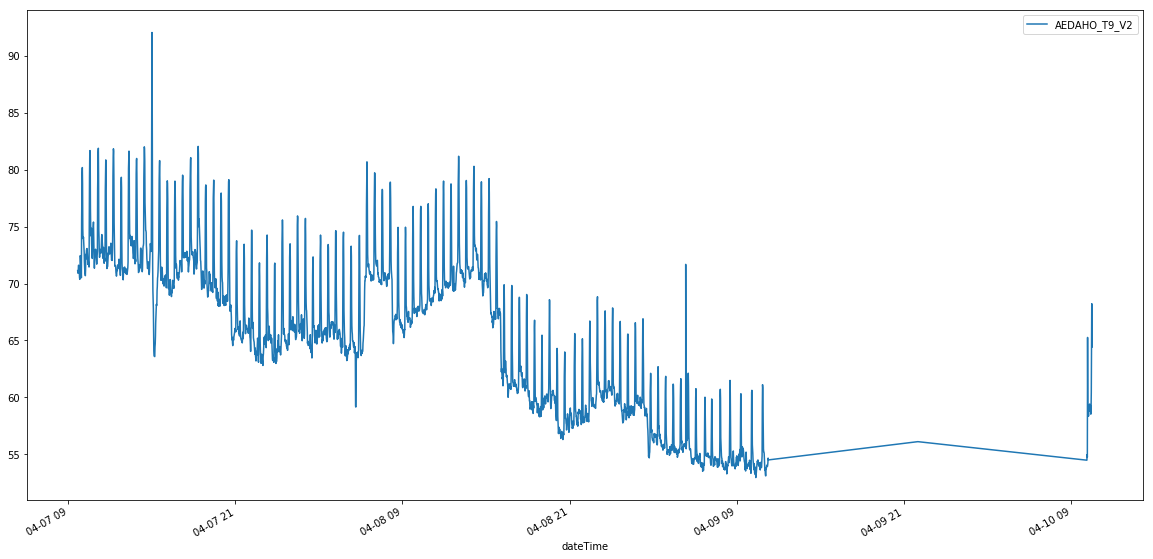

In [104]:
univariate_data_mean.plot()
plt.show()

In [219]:
print(univariate_data_mean.shape)

(3000, 1)


In [105]:
# Determining rolling statistics
n=60
rolmean = univariate_data_mean.rolling(window=n).mean()

rolstd = univariate_data_mean.rolling(window=n).std()

# print('rolmean: ',rolmean,'\nrolstd: ',rolstd)

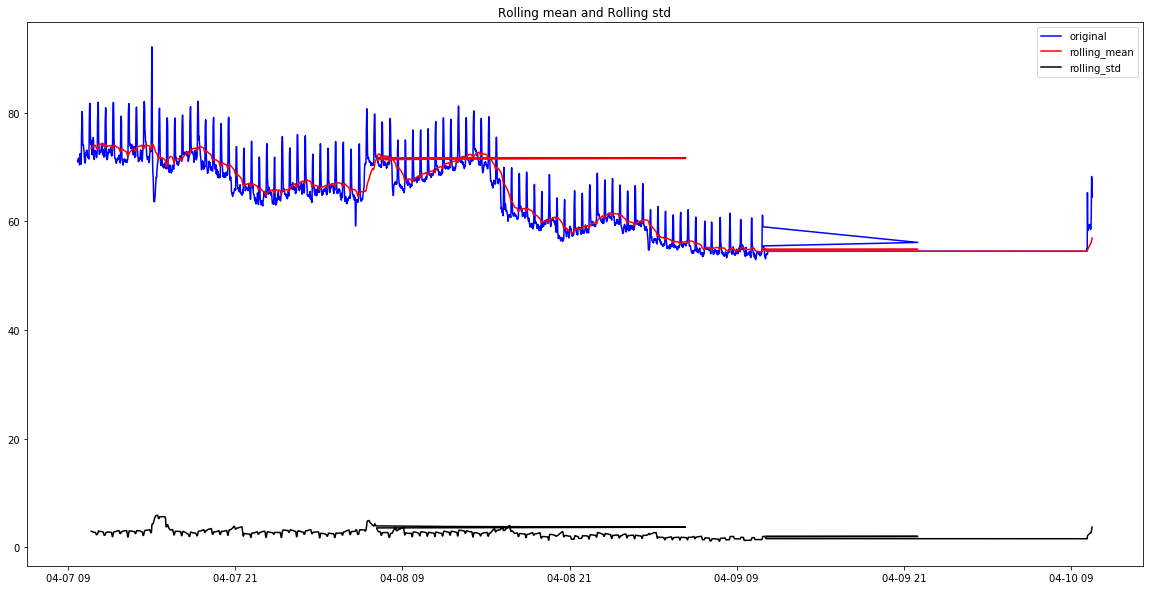

In [106]:
orig=plt.plot(univariate_data_mean,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rolling_mean')
std=plt.plot(rolstd,color='black',label='rolling_std')
plt.legend(loc='best')
plt.title('Rolling mean and Rolling std')
plt.show(block=False)

In [107]:
# Perform DIckey fuller test

# univariate_data_mean = univariate_data

from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller test: ')

dftest=adfuller(univariate_data_mean['AEDAHO_T9_V2'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

for key,value in dftest[4].items():
    dfoutput['Critical value(%s)'%key]=value

    
print(dfoutput)

Results of Dickey Fuller test: 
Test Statistics                   -0.900185
P_value                            0.787911
#Lags_used                        29.000000
Numbers of observations used    2970.000000
Critical value(1%)                -3.432554
Critical value(5%)                -2.862514
Critical value(10%)               -2.567288
dtype: float64


In [108]:
print(univariate_data.head())
print(univariate_data_mean.head())

                     AEDAHO_T9_V2
dateTime                         
2019-04-07 09:41:00     71.135968
2019-04-07 09:42:00     70.913978
2019-04-07 09:43:00     71.027346
2019-04-07 09:44:00     71.401352
2019-04-07 09:45:00     71.615506
                     AEDAHO_T9_V2
dateTime                         
2019-04-07 09:41:00     71.135968
2019-04-07 09:42:00     70.913978
2019-04-07 09:43:00     71.027346
2019-04-07 09:44:00     71.401352
2019-04-07 09:45:00     71.615506


In [109]:
from numpy import nan
univariate_data_mean = univariate_data_mean.replace(0,nan)
univariate_data_mean = univariate_data_mean.dropna(how='any',axis=0)
print(datasetLogDiffShifting.isnull().sum())

AEDAHO_T9_V2    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
(3000, 1)


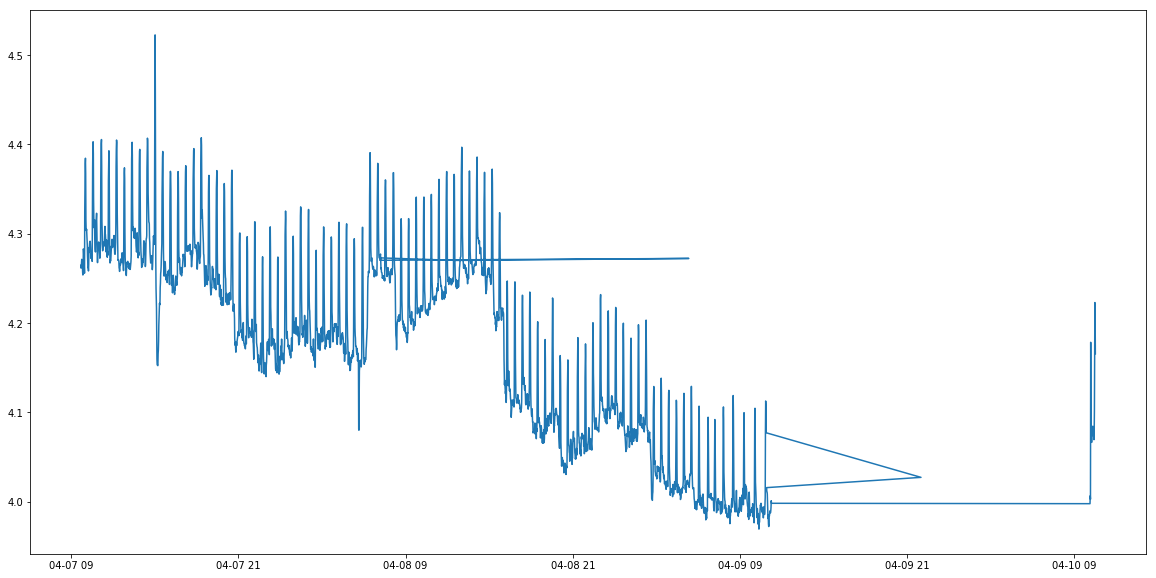

In [220]:
univariate_data_mean_logscale=np.log(univariate_data_mean)
plt.plot(univariate_data_mean_logscale)
print(type(univariate_data_mean_logscale))
print(univariate_data_mean_logscale.shape)

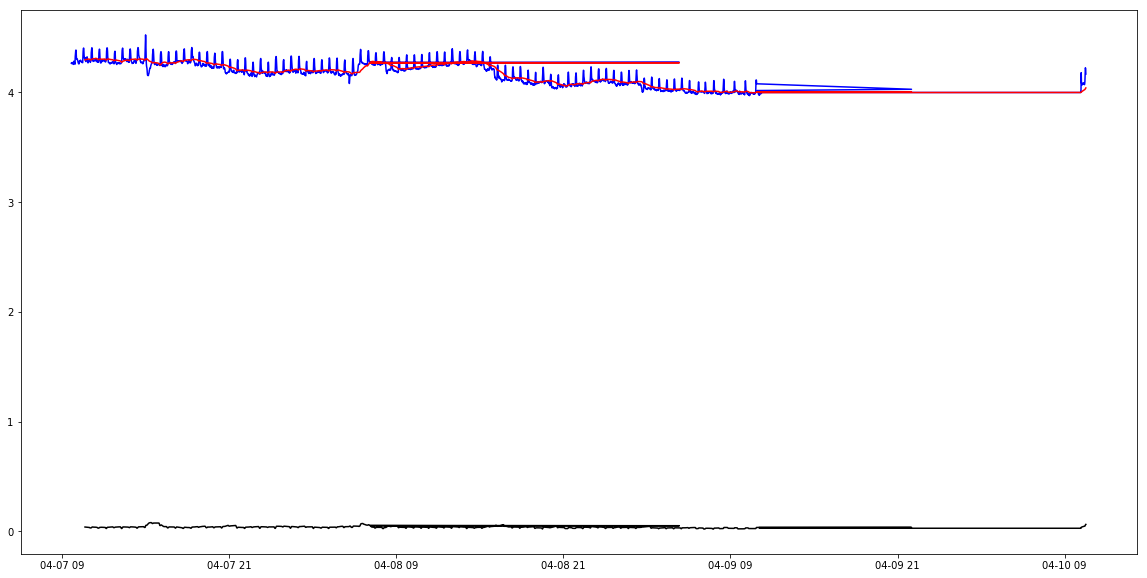

In [111]:
n = 60
movingAverage=univariate_data_mean_logscale.rolling(window=n).mean()
movingStd=univariate_data_mean_logscale.rolling(window=n).std()

plt.plot(univariate_data_mean_logscale,color='blue')
plt.plot(movingAverage,color='red')
plt.plot(movingStd,color='black')

In [112]:
datasetLogScaleMinusMovingAverage=univariate_data_mean_logscale - movingAverage
# datasetLogScaleMinusMovingAverage.head(60)

In [113]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
# datasetLogScaleMinusMovingAverage.head(60)

In [114]:
from statsmodels.tsa.stattools import adfuller
n = 60
def test_stationarity(timeseries):
    global n
    movingAverage=timeseries.rolling(window=n).mean()
    movingStd=timeseries.rolling(window=n).std()
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(movingAverage,color='red',label='rolling_mean')
    std=plt.plot(movingStd,color='black',label='rolling_std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Rolling std')
    plt.show(block=False)
    
    
    print('Results of Dickey Fuller test: ')

    dftest=adfuller(timeseries['AEDAHO_T9_V2'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','P_value','#Lags_used','Numbers of observations used'])

    for key,value in dftest[4].items():
        dfoutput['Critical value(%s)'%key]=value

    print(dfoutput)

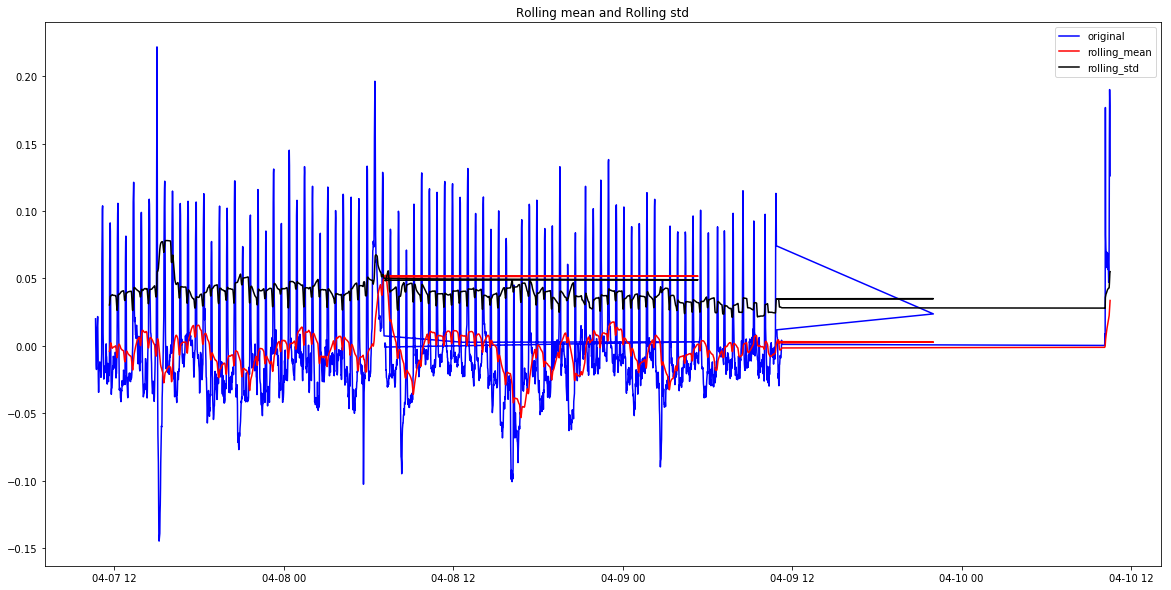

Results of Dickey Fuller test: 
Test Statistics                   -5.005689
P_value                            0.000022
#Lags_used                        28.000000
Numbers of observations used    2912.000000
Critical value(1%)                -3.432598
Critical value(5%)                -2.862533
Critical value(10%)               -2.567299
dtype: float64


In [115]:
test_stationarity(datasetLogScaleMinusMovingAverage)

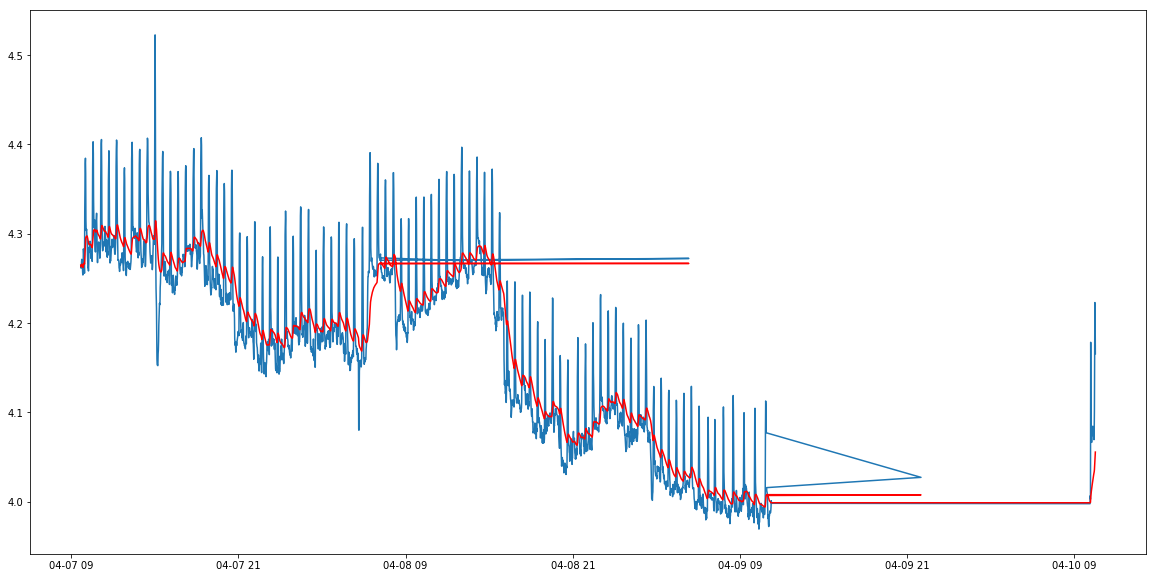

In [116]:
# exponentialDecayWeightedAverage=univariate_data_mean_logscale.ewm(halflife=n,min_periods=0,adjust=True).mean()
exponentialDecayWeightedAverage = univariate_data_mean_logscale.ewm(span=60).mean()
plt.plot(univariate_data_mean_logscale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [117]:
datasetLogScaleMinusMovingExponentialDecayAverage=univariate_data_mean_logscale - exponentialDecayWeightedAverage

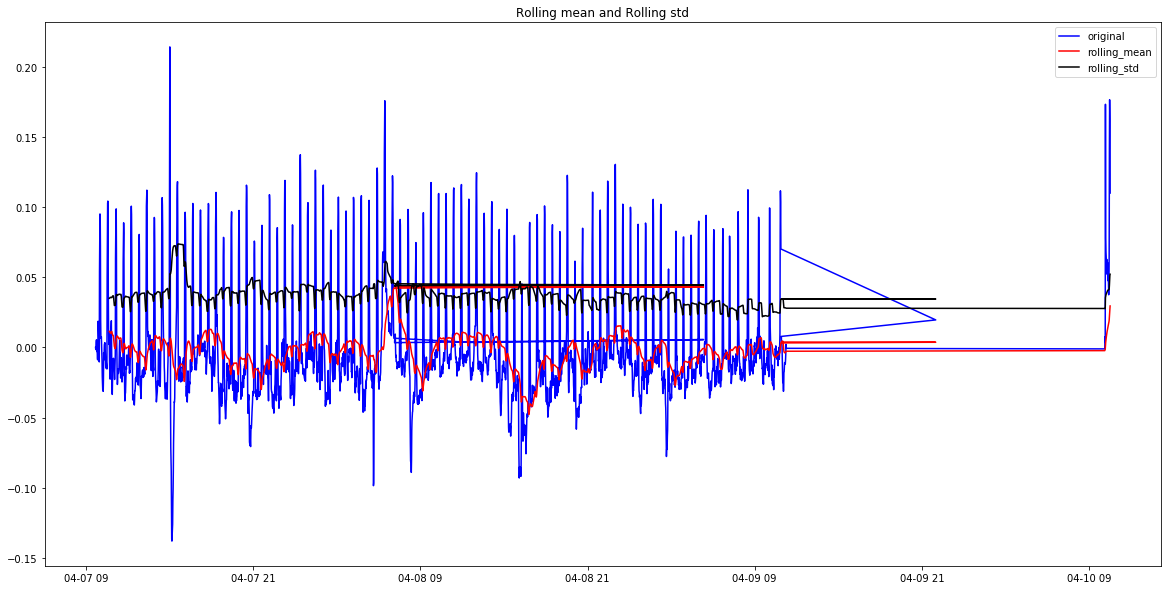

Results of Dickey Fuller test: 
Test Statistics                   -3.917244
P_value                            0.001912
#Lags_used                        29.000000
Numbers of observations used    2970.000000
Critical value(1%)                -3.432554
Critical value(5%)                -2.862514
Critical value(10%)               -2.567288
dtype: float64


In [118]:
datasetLogScaleMinusMovingExponentialDecayAverage.dropna(inplace=True)
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

<class 'pandas.core.frame.DataFrame'>
(3000, 1)


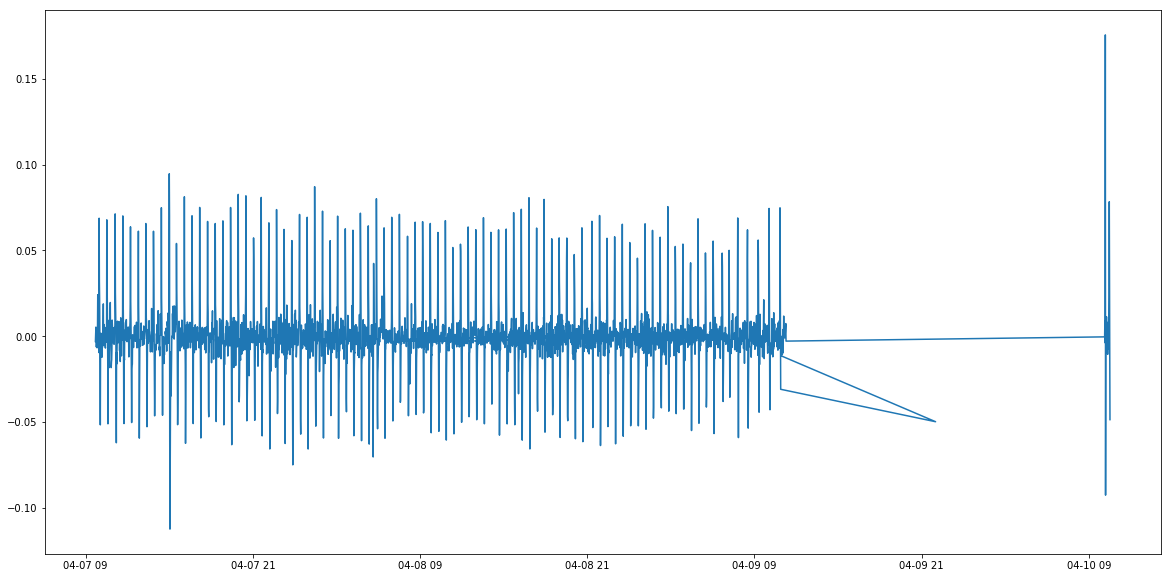

In [221]:
datasetLogDiffShifting=univariate_data_mean_logscale - univariate_data_mean_logscale.shift()
plt.plot(datasetLogDiffShifting)

print(type(datasetLogDiffShifting))
print(datasetLogDiffShifting.shape)

AEDAHO_T9_V2    0
dtype: int64


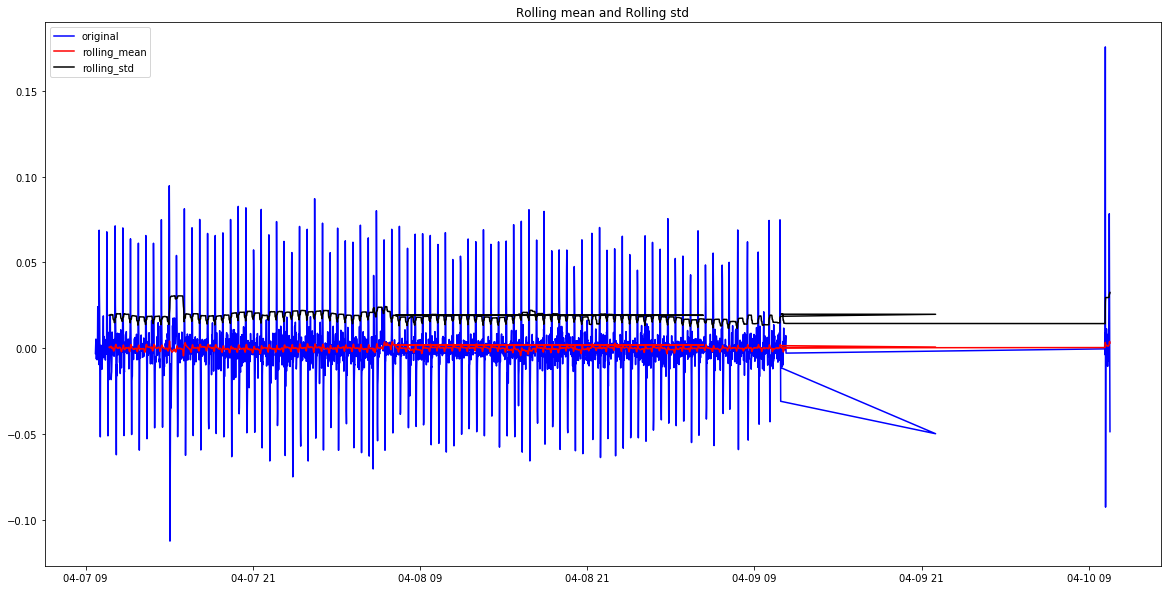

Results of Dickey Fuller test: 
Test Statistics                  -30.708786
P_value                            0.000000
#Lags_used                        29.000000
Numbers of observations used    2969.000000
Critical value(1%)                -3.432554
Critical value(5%)                -2.862514
Critical value(10%)               -2.567288
dtype: float64


In [120]:
datasetLogDiffShifting.dropna(inplace=True)
print(datasetLogDiffShifting.isnull().sum())
test_stationarity(datasetLogDiffShifting)

C:\Users\atif\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


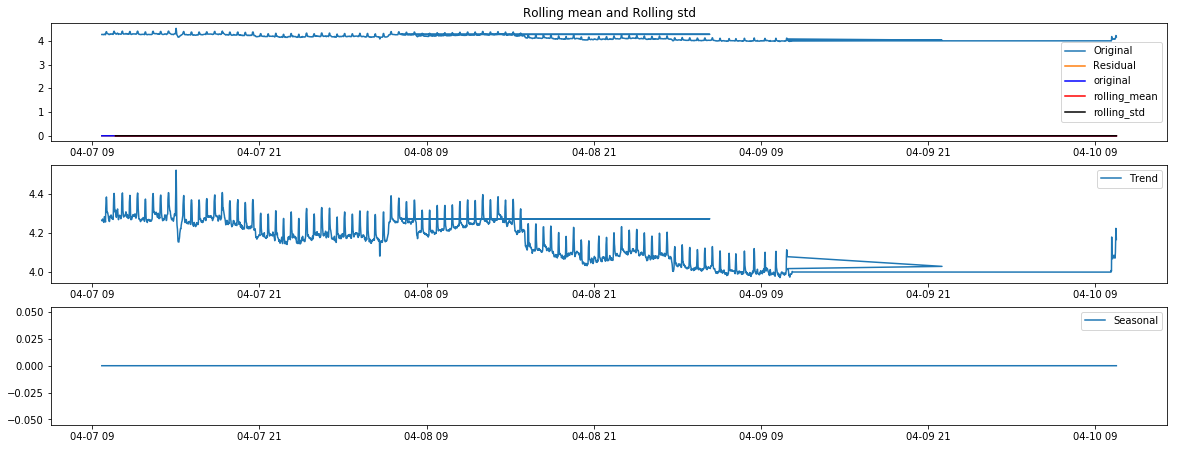

Results of Dickey Fuller test: 
Test Statistics                         NaN
P_value                                 NaN
#Lags_used                         0.000000
Numbers of observations used    2999.000000
Critical value(1%)                -3.432532
Critical value(5%)                -2.862504
Critical value(10%)               -2.567283
dtype: float64


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(univariate_data_mean_logscale,freq=1)

trend = decomposition.trend
seasonal =decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(univariate_data_mean_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(411)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

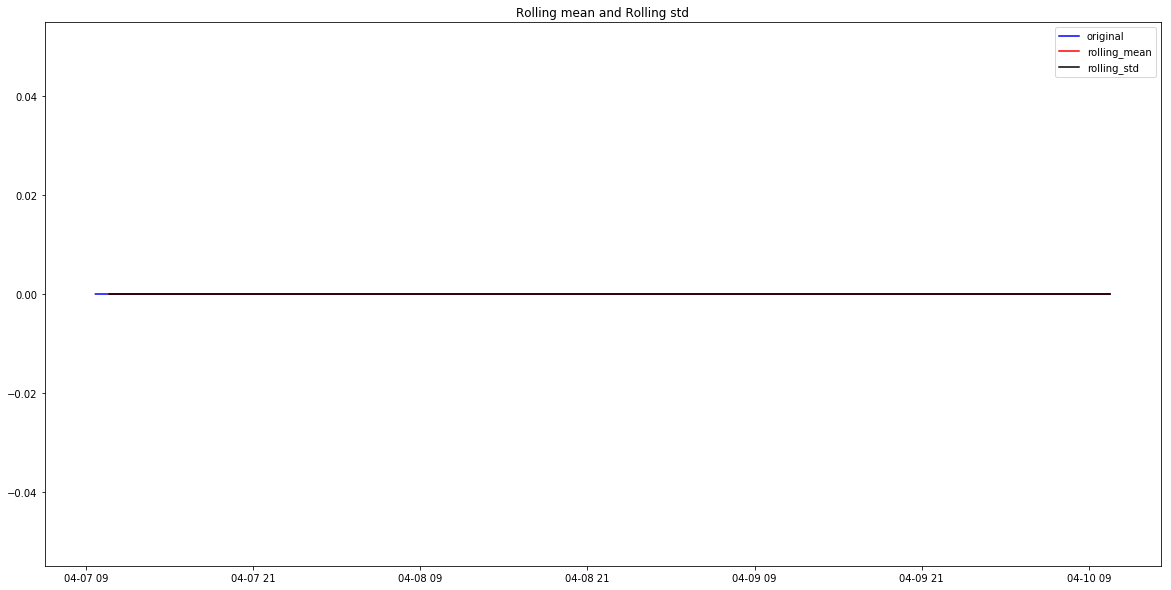

Results of Dickey Fuller test: 
Test Statistics                         NaN
P_value                                 NaN
#Lags_used                         0.000000
Numbers of observations used    2999.000000
Critical value(1%)                -3.432532
Critical value(5%)                -2.862504
Critical value(10%)               -2.567283
dtype: float64


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:846: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\atif\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1738: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [122]:
decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

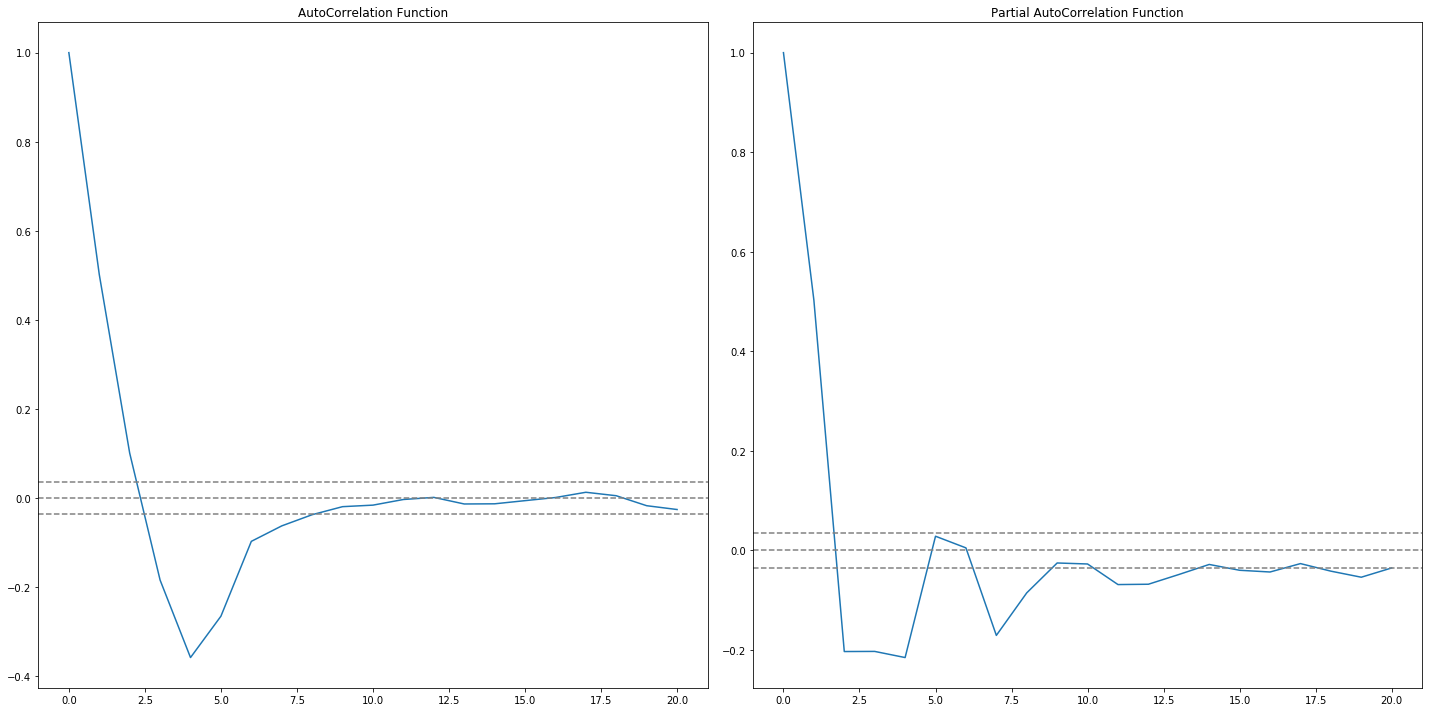

In [123]:
#ACF and PACF plots

from statsmodels.tsa.stattools import acf, pacf

log_acf=acf(datasetLogDiffShifting,nlags=20)
log_pacf= pacf(datasetLogDiffShifting,nlags=20, method='ols')

#plot ACF

plt.subplot(121)
plt.plot(log_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('AutoCorrelation Function')

#plot PACF

plt.subplot(122)
plt.plot(log_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--',color='gray')
plt.title('Partial AutoCorrelation Function')
plt.tight_layout()

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


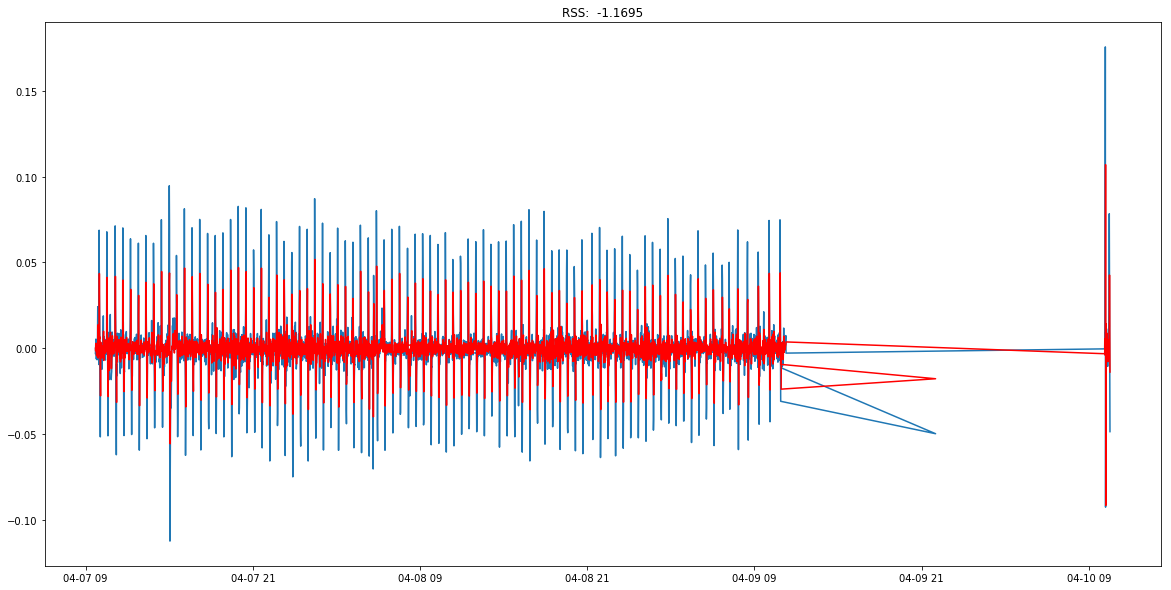

In [156]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

#AR model

model =ARIMA(univariate_data_mean_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_AR.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting MA model


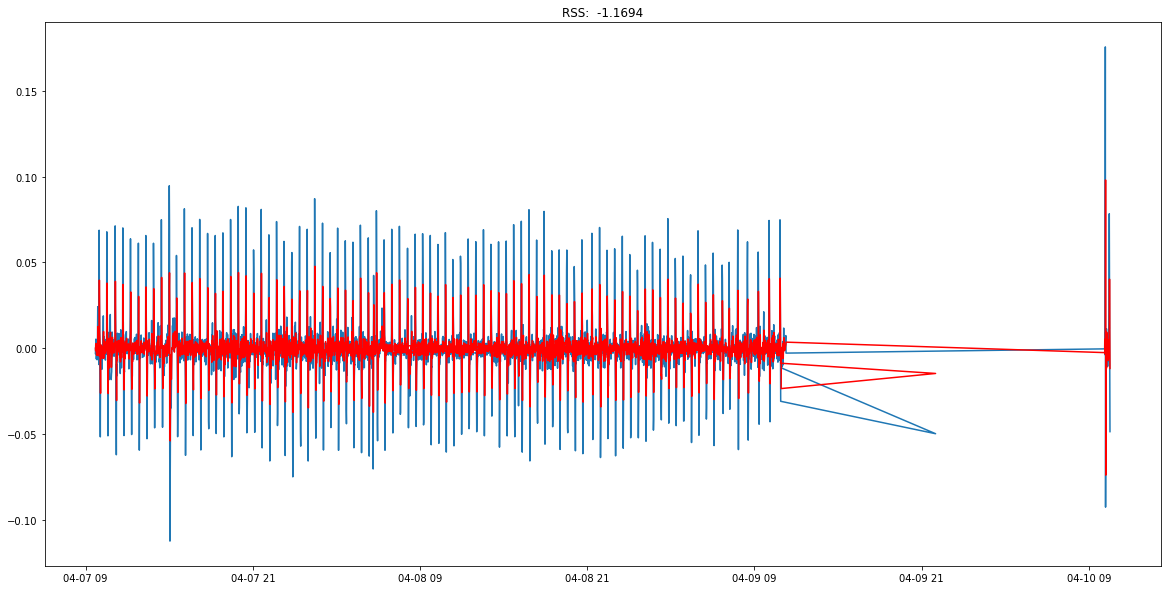

In [125]:
# MA model

model =ARIMA(univariate_data_mean_logscale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_MA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting MA model')

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


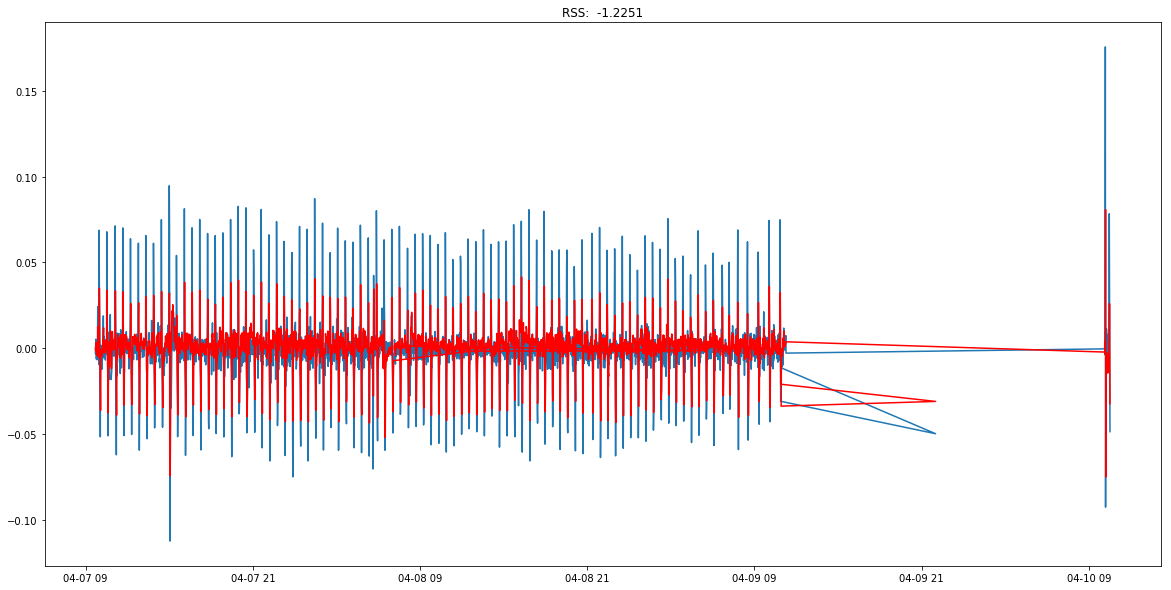

In [126]:
model =ARIMA(univariate_data_mean_logscale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:  %.4f'%sum(results_ARIMA.fittedvalues-datasetLogDiffShifting['AEDAHO_T9_V2']**2))
print('Plotting AR model')

In [222]:
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())
print(predictions_ARIMA_diff.shape)

dateTime
2019-04-07 09:42:00   -0.000075
2019-04-07 09:43:00   -0.001614
2019-04-07 09:44:00    0.001542
2019-04-07 09:45:00    0.003254
2019-04-07 09:46:00    0.001241
dtype: float64
(2999,)


In [223]:
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())
print(predictions_ARIMA_diff_cumsum.shape)

dateTime
2019-04-07 09:42:00   -0.000075
2019-04-07 09:43:00   -0.001690
2019-04-07 09:44:00   -0.000148
2019-04-07 09:45:00    0.003106
2019-04-07 09:46:00    0.004348
dtype: float64
(2999,)


In [235]:
predictions_ARIMA_log = pd.Series(univariate_data_mean_logscale['AEDAHO_T9_V2'].iloc[0], index=univariate_data_mean_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
print(predictions_ARIMA_log.head())

print(type(univariate_data_mean_logscale))
print(type(predictions_ARIMA_log))

print(univariate_data_mean_logscale.shape)
print(predictions_ARIMA_log.shape)

dateTime
2019-04-07 09:41:00    4.264593
2019-04-07 09:42:00    4.264518
2019-04-07 09:43:00    4.262903
2019-04-07 09:44:00    4.264445
2019-04-07 09:45:00    4.267699
dtype: float64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(3000, 1)
(3004,)


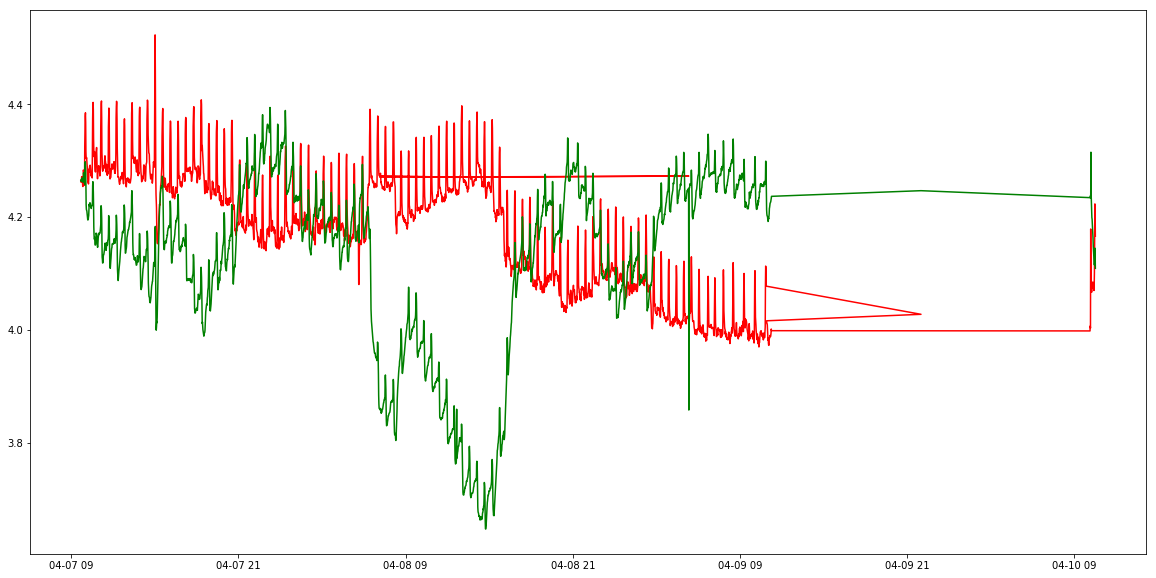

In [239]:
plt.plot(univariate_data_mean_logscale, color = 'red')
plt.plot(predictions_ARIMA_log, color ='green')

univariate_data_mean type:  <class 'pandas.core.frame.DataFrame'>
univariate_data_mean shape:  (3000, 1) 	 size:  3000
predictions_ARIMA type:  <class 'pandas.core.series.Series'>
predictions_ARIMA shape:  (3004,) 	 size:  3004


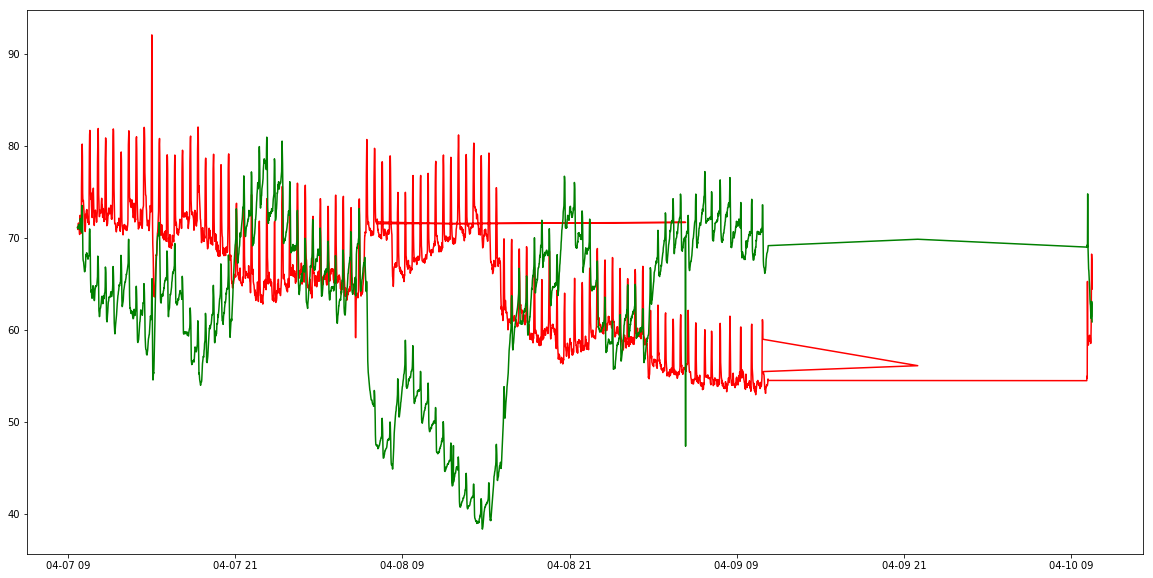

In [241]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(univariate_data_mean, color= 'red')
plt.plot(predictions_ARIMA, color = 'green')
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - univariate_data_mean)**2)/len(univariate_data_mean)))
print('univariate_data_mean type: ', type(univariate_data_mean))
print('univariate_data_mean shape: ', univariate_data_mean.shape,'\t size: ', univariate_data_mean.size)

print('predictions_ARIMA type: ', type(predictions_ARIMA))
print('predictions_ARIMA shape: ', predictions_ARIMA.shape,'\t size: ', predictions_ARIMA.size)

In [244]:
from numpy import nan
predictions_ARIMA_1 = predictions_ARIMA.replace(0,nan)
predictions_ARIMA_1 = predictions_ARIMA_1.dropna(how='any',axis=0)
print(predictions_ARIMA_1.isnull().sum())
print(predictions_ARIMA_1.shape)

# print(predictions_ARIMA.types)
# print(univariate_data_mean.types)

0
(3004,)


In [218]:
# a = np.sqrt(sum((predictions_ARIMA - predictions_ARIMA_log)**2)/len(predictions_ARIMA_log))
print(a)
print(type(predictions_ARIMA))
#, index=univariate_data_mean.index, columns = 'AEDAHO_T9_V2'
new_arima = pd.DataFrame(predictions_ARIMA)
# print(new_arima.head())
print(type(new_arima))
print(type(univariate_data_mean))

aaa = new_arima - univariate_data_mean
print(new_arima.shape)
print(univariate_data_mean.shape)

print(aaa.shape)
# print(new_arima.shape)
# print(new_arima.isnull().sum())

# a = np.sqrt((sum(new_arima - univariate_data_mean)**2)/len(univariate_data_mean))

59.000447227241374
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(3004, 1)
(3000, 1)
(3012, 2)


In [227]:
print(type(univariate_data_mean_logscale))
univariate_data_mean_logscale

<class 'pandas.core.frame.DataFrame'>


,AEDAHO_T9_V2
dateTime,
2019-04-07 09:41:00,4.264593
2019-04-07 09:42:00,4.261468
2019-04-07 09:43:00,4.263065
2019-04-07 09:44:00,4.268317
2019-04-07 09:45:00,4.271312
2019-04-07 09:46:00,4.264956
2019-04-07 09:47:00,4.262231
2019-04-07 09:48:00,4.262946
2019-04-07 09:49:00,4.256143


C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


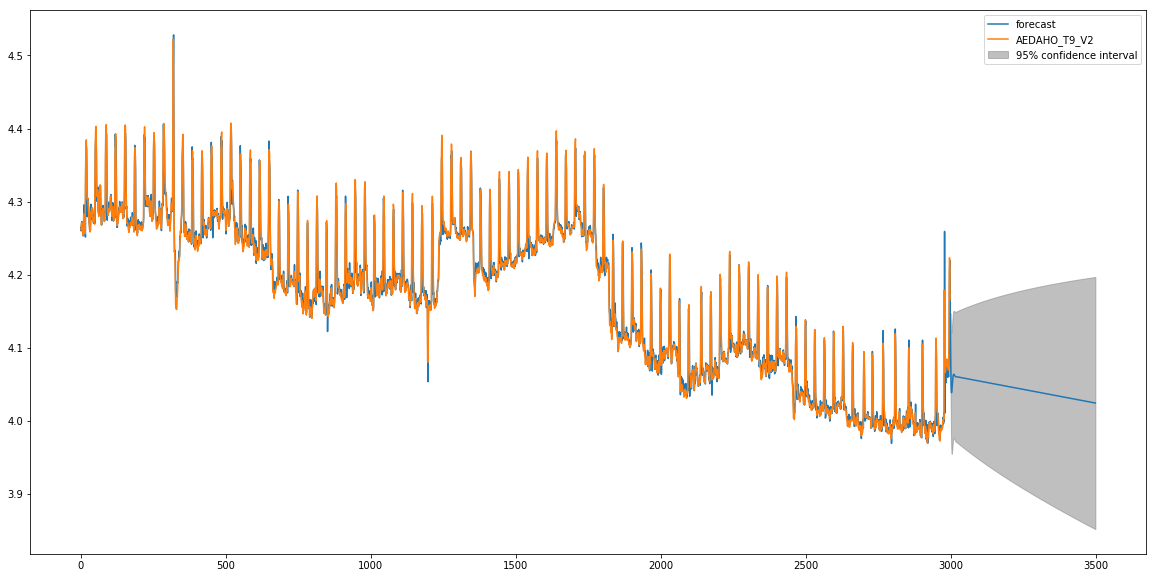

In [228]:
results_ARIMA.plot_predict(1,3500)# 260 came how? look former output, 200 row. 200 + how many step??
x=results_ARIMA.forecast(steps=500)

# take a look here. We have started the journey with 2000:5000 that means with 3000 data.
# So here if we think to forecast x usnit value we will write 3000+x
# steps = x

In [172]:
print(type(univariate_data))
print(type(univariate_data_mean))
print(type(univariate_data_mean_logscale))
print(type(datasetLogDiffShifting))

print('\n')
print(type(results_ARIMA))
print(type(predictions_ARIMA_diff))
print(type(predictions_ARIMA_diff_cumsum))
print(type(predictions_ARIMA_log))
print(type(predictions_ARIMA))

print('univariate_data_mean_logscale: ',univariate_data_mean_logscale.shape)
print('predictions_ARIMA: ',predictions_ARIMA.shape)

print('univariate_data_mean_logscale: ',univariate_data_mean_logscale.size)
print('predictions_ARIMA: ',predictions_ARIMA_diff.size)
print('predictions_ARIMA: ',predictions_ARIMA_diff_cumsum.size)
print('predictions_ARIMA: ',predictions_ARIMA_log.size)
print('predictions_ARIMA: ',predictions_ARIMA.size)

print(univariate_data_mean.tail())
print(predictions_ARIMA.tail())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


<class 'statsmodels.tsa.arima_model.ARIMAResultsWrapper'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
univariate_data_mean_logscale:  (3000, 1)
predictions_ARIMA:  (3004,)
univariate_data_mean_logscale:  3000
predictions_ARIMA:  2999
predictions_ARIMA:  2999
predictions_ARIMA:  3004
predictions_ARIMA:  3004
                     AEDAHO_T9_V2
dateTime                         
2019-04-10 10:27:00     60.423638
2019-04-10 10:28:00     65.349113
2019-04-10 10:29:00     68.233293
2019-04-10 10:30:00     67.651555
2019-04-10 10:31:00     64.434328
dateTime
2019-04-10 10:27:00    61.236808
2019-04-10 10:28:00    61.486425
2019-04-10 10:29:00    63.097454
2019-04-10 10:30:00    62.880152
2019-04-10 10:31:00    60.871753
dtype: float64


# Choose predictions_ARIMA for making dataset and perform ARIMA testing

In [229]:
def make_dataset(PandaDataframe):
    dataset = np.array(PandaDataframe)

    NumberOfElements = int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    train_data = dataset[0:NumberOfElements]
    test_data = dataset[NumberOfElements:len(dataset)]
    
    return train_data, test_data

train_set, test_set = make_dataset(predictions_ARIMA)
print('train_set shape: ', train_set.shape)
print('test_set shape: ', test_set.shape)

dataset length:  3000
Number of Elements for training:  2700
train_set shape:  (2700,)
test_set shape:  (300,)


In [232]:
Actual = [x for x in train_set]
Predictions = list()

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

In [234]:
count_1=1
for timepoint in range(len(test_set)):
#     print('I am in for loop')
    ActualValue =  test_set[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,1)
    print('count=%d, Actual=%f, Predicted=%f' % (count_1 ,ActualValue, Prediction))
    count_1+=1
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:765: RuntimeWarning: divide by zero encountered in log
  return np.log(self.sigma2) + (1 + self.df_model) * np.log(nobs)/nobs
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:819: RuntimeWarning: divide by zero encountered in log
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)
C:\Users\atif\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:819: RuntimeWarning: invalid value encountered in double_scalars
  llf = -nobs/2.*(log(2*pi) + log(sigma2)) - ssr/(2*sigma2)


LinAlgError: SVD did not converge

In [176]:
print('Actual type: ',type(Actual),' size: ',len(Actual))
print('Predictions type: ',type(Predictions),' size: ',len(Predictions))
print('test_set type: ',type(test_set),' size: ',len(test_set))

Actual type:  <class 'list'>  size:  3004
Predictions type:  <class 'list'>  size:  301
test_set type:  <class 'numpy.ndarray'>  size:  301


In [177]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_set, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)

print("size of prediction: ",len(Predictions))
print("size of actual: ",len(Actual))

Test Mean Squared Error (smaller the better fit): 1.005
size of prediction:  301
size of actual:  3004


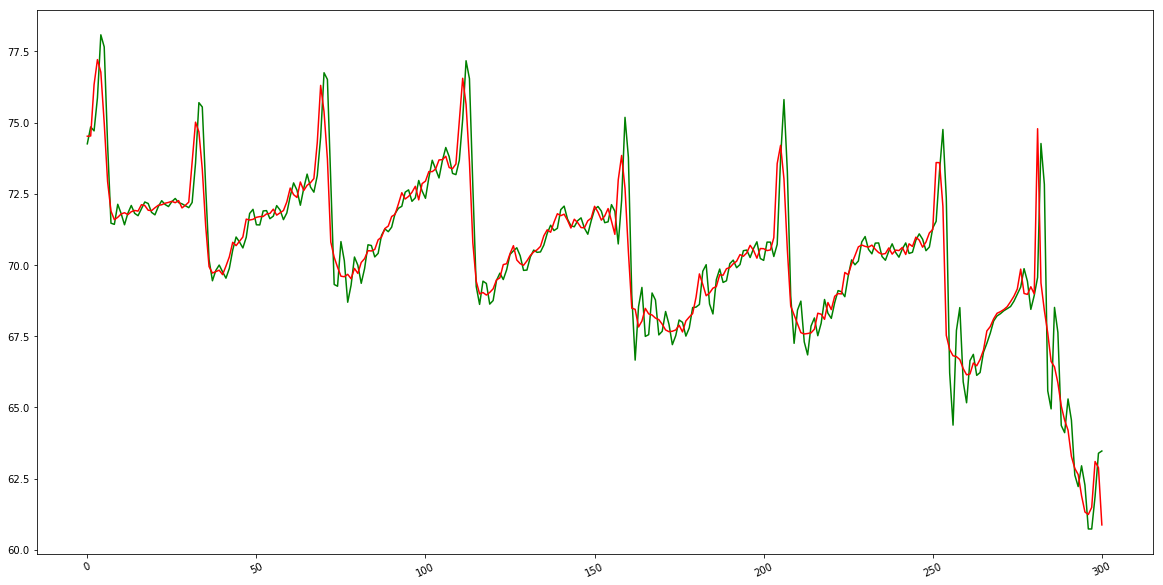

In [178]:
plt.plot(Predictions,color='green')
plt.plot(test_set,color='red')
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()